# Problème 1 : Ensemble de Mandelbrot

On considère les suites complexes $(z_n)_{n\in\mathbb{N}}$ définies par :

$$
\begin{cases}
z_0=0\\
z_{n+1}=z_n^2+c
\end{cases}
\tag{$\star$}
$$

où $c$ est un nombre complexe donné.

Le comportement de ces suites diffère selon la valeur de $c$ : elles peuvent être bornées (le module des termes de la suite est borné) ou non. L'ensemble des valeurs de $c$ pour lesquelles ces suites sont bornées est appelé **ensemble de Mandelbrot** et est noté $M$.

Malgré la simplicité apparente de sa définition, cet ensemble s'avère d'une grande complexité. L'objectif de ce problème est de produire, à l'aide d'un ordinateur, une représentation graphique de l'ensemble de Mandelbrot dans le plan complexe. (On rappelle qu'un nombre complexe est représenté graphiquement par un point dont l'abscisse est la partie réelle et l'ordonnée la partie imaginaire.)

## A. Calcul des termes d'une suite de type ($\star$)

* Calculer à la main les termes de la suite de type ($\star$) associée à $c = 1+i$ jusqu'au rang 3.

<span style="color: blue;">
z1 = 1+i <br>
z2 = 1+3*i  <br>
z3 = -7 + 7*i  </span>


Dans la suite de ce problème, nous allons effectuer des calculs avec des nombres complexes en Python. Pour cela, nous allons utiliser le type `complex` qui permet de représenter et de manipuler les nombres complexes. Nous renvoyons au document *Calcul d'expressions numériques* pour plus d'information sur le type `complex`.

- Ecrire une fonction `suite` qui prend en paramètres un entier `n` et un complexe `c` et renvoie la valeur au rang `n` de la suite de type ($\star$) associée à `c`.

In [38]:
def suite(n, c):
    z = 0
    for i in range(n):
        z = z**2 + c
    return z

- A l'aide de la fonction `suite`, calculer le terme de la suite de type ($\star$) associée à $c = 1+i$ au rang 3.

In [39]:
print(suite(3, complex(1, 1)))

(-7+7j)


- En expérimentant avec la fonction `suite`, conjecturer si les suites de type ($\star$) associées à $c_1 = \frac{1}{2}+\frac{1}{2}i$, $c_2 = -\frac{1}{4}+\frac{1}{2}i$, $c_3 = -1 + \frac{1}{5}i$ et $c_4 = \frac{1}{5} + i$ sont bornées ou non. En déduire (toujours de manière conjecturale) quels nombres parmi $c_1, c_2, c_3, c_4$ appartiennent à l'ensemble de Mandelbrot.

In [40]:
print(suite(5, complex(1/2, 1/2)))
print(suite(10000, complex(-1/4, + 1/2)))
print(suite(1000, complex(-1 + 1/5)))
print(suite(6, complex(1/5 + 1)))

(3.28515625+1.34375j)
(-0.2768869870150186+0.32179712645279124j)
(-0.2763932022500206+0j)
(21320059.336314328+0j)


<span style="color: blue;">
c1 n'appartient pas à l'ensemble d Mandelbrot <br>
c2 appartient à l'ensemble de Mandelbrot <br>
c3 appartient à l'ensemble<br>
c4 n'appartient pas à l'ensemble</span>

## B. Algorithme pour déterminer l'appartenance à l'ensemble de Mandelbrot

Il n'existe pas de critère simple pour déterminer si un nombre complexe $c$ appartient ou non à l'ensemble de Mandelbrot. On dispose cependant du résultat suivant (admis) :

*Soit $(z_n)_{n\in\mathbb{N}}$ une suite de type ($\star$). S'il existe un rang $k \in \mathbb{N}$ tel que $|z_k| > 2$, alors la suite $(z_n)_{n\in\mathbb{N}}$ tend vers l'infini en module.*

Au vu de ce résultat, on peut proposer l'algorithme suivant pour déterminer si un nombre $c$ appartient ou non à l'ensemble de Mandelbrot. 

*On calcule les termes de la suite $(z_n)_{n\in\mathbb{N}}$ associée à $c$ jusqu'à un rang assez grand (rang à fixer en fonction de la puissance de calcul disponible et de l'exigence de précision). Dès qu'un terme dépasse 2 en module, on peut arrêter le calcul et conclure que $c$ n'appartient pas à l'ensemble de Mandelbrot. Si, au rang d'arrêt fixé, aucun terme n'a dépassé 2 en module, alors on considère que $c$ appartient à l'ensemble de Mandelbrot.*

* Expliquer pourquoi cet algorithme n'est qu'approximatif et préciser dans quel cas il peut renvoyer une mauvaise réponse sur l'appartenance à l'ensemble de Mandelbrot.

Nous testons la suite qu'à partir d'un certain nombre. Si en testant, nous nous rendons compte que la valeur de sortie est plus grande (> à 2), nous considerons que le c n'appartient pas à l'ensemble et inversement. Rien ne nous garantit que les elements de la suite ne soient pas bornées.

- Ecrire une fonction `dansM` qui détermine si un nombre complexe appartient à l'ensemble de Mandelbrot en utilisant l'algorithme décrit ci-dessus. Cette fonction prendra en paramètres le nombre complexe à tester et le rang d'arrêt de l'algorithme. Attention, il n'est pas efficace de calculer les termes de la suite en appelant plusieurs fois la fonction `suite` (cela engendre des calculs inutiles).

In [41]:
import math
def dansM(c: complex, rang: int):
    z = 0
    for _ in range(rang):
        z = z**2 + c
        if abs(z) >= 2:
            return False
    return True

* Tester la fonction `dansM` sur des exemples.

In [45]:
print(dansM(complex(-1/4, + 1/2), 1000))
print(dansM(complex(1/5 + 1), 5))
print(dansM(complex(-2, -2), 100))
print(dansM(complex(-2, -6), 100))

True
False
False
False


## C. Représentation graphique de l'ensemble de Mandelbrot

On pose $ D = \{ z \in \mathbb{C} \:|\: -2 \leq \operatorname{Re}(z) \leq 2 \:\text{ et }\: -2 \leq \operatorname{Im}(z) \leq 2 \}.$

- Expliquer pourquoi l'ensemble de Mandelbrot est inclus dans cet ensemble $D$.

Si le réel ou l'image de Z est superieur à 2 ou -2, le module de Z sera forcement supérieur à 2, donc les éléments de l'ensemble de Mandelbrot sont forcement inclus dans l'ensemble D

Pour obtenir une représentation de l'ensemble de Mandelbrot, on propose la méthode suivante. 

*On balaie l'ensemble de nombres complexes répartis sur une grille (suffisamment fine) couvrant $D$. Pami ces nombres, on détermine ceux qui appartiennent à l'ensemble de Mandelbrot et on affiche les points correspondants dans une fenêtre graphique.*

- Pour commencer, écrire une fonction `trace_grille` qui trace l'ensemble des nombres complexes répartis sur une grille couvrant $D$. Cette fonction prendra comme argument le nombre de points dans chaque direction de la grille. Pour ce tracé, on utilisera la fonction `plot` de la bibliothèque `Matplotlib`. Pour des explications plus détaillées sur les grilles de points, voir le document *Parcourir une grille de points*. Pour des explications plus détaillées sur la bibliothèque `Matplotlib` et la fonction `plot`, voir le document *Représentations graphiques*.

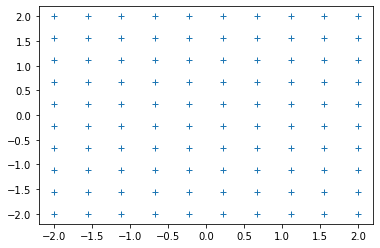

In [46]:
import matplotlib.pyplot as plt
from numpy import linspace

def trace_grille (nx=10, ny=10):
    a, b = -2, 2
    c, d = -2, 2
     

    xx, yy = [], []
    for x in linspace(a, b, nx):
        for y in linspace(a, b, ny):
            xx.append(x)
            yy.append(y)

    plt.plot(xx, yy, marker='+', linestyle='')
    plt.show()


trace_grille()

- Ecrire une fonction `traceM` qui trace une représentation graphique de l'ensemble de Mandelbrot (selon la méthode de balayage d'une grille décrite plus haut). Cette fonction prendra comme argument le nombre de points dans chaque direction de la grille. Pour le tracé des points, on utilisera la marque pixel (`marker=','`) afin d'éviter les chevauchements entre les marques des points .

In [ ]:
def traceM(nbr_points):
    a = -2
    b = 2
    lstx = []
    lsty = []

    for i in linspace(a, b, nbr_points):
        for j in linspace(a, b, nbr_points):
            if dansM(complex(i, j), 100):
                lstx.append(i)
                lsty.append(j)
    plt.plot(lstx, lsty, marker=',', linestyle='', color='darkblue')
    plt.show()

- Tracer une représentation (la plus précise possible) de l'ensemble de Mandelbrot en utilisant la fonction `traceM`.

In [ ]:
traceM(1000)

Une des particularités de l'ensemble de Mandelbrot est la complexité de sa frontière et notamment la répétition des mêmes structures à différentes échelles. 

* Pour observer ce phénomène, écrire une fonction `traceM2` qui permet de tracer une représentation graphique de l'ensemble de Mandelbrot sur une fenêtre du type

$$\{ z \in \mathbb{C} \:|\: x_{min} \leq \operatorname{Re}(z) \leq x_{max} \:\text{ et }\: y_{min}\leq \operatorname{Im}(z) \leq y_{max} \},$$ 

où $x_{min}, x_{max}, y_{min}, y_{max}$ sont des paramètres. 

In [ ]:
def traceM2(nbr_points, xmin=-2, xmax=2, ymin=-2, ymax=2):
    lstx = []
    lsty = []

    for i in linspace(xmin, xmax, nbr_points):
        for j in linspace(ymin, ymax, nbr_points):
            if dansM(complex(i, j), 100):
                lstx.append(i)
                lsty.append(j)
    plt.plot(lstx, lsty, marker=',', linestyle='', color='darkblue')
    plt.show()

* A l'aide de cette fonction, tracer une représentation (la plus précise possible) de l'ensemble de Mandelbrot en zoomant sur une petite partie de sa frontière. 

In [ ]:
traceM2(750, -0.5, 0, -1, -0.5)

## D. Quelques propriétés géométriques de l'ensemble de Mandelbrot

### D.1 Un disque inclus dans l'ensemble

Soit $c \in \mathbb{C}$ tel que $|c|\leq 1/4$. Soit $(z_n)_{n\in\mathbb{N}}$ la suite de type ($\star$) associée à $c$.
* Montrer par récurrence que, pour tout $n\in \mathbb{N}$, $|z_n|\leq 1/2$.  
* Que peut-on conclure sur l'appartenance de $c$ à l'ensemble de Mandelbrot ?
* En déduire qu'un certain disque (dont on précisera le centre et le rayon) est inclus dans l'ensemble de Mandelbrot.

<span style="color: blue;"> Par recurrence: commençons par l'initialisation: <br>
n = 0 => Z0 = 0 donc 0 ≤ 1/2. La propriété est vraie au rang 0 <br></span>
<span style="color: blue;">Hérédité: <br>
n = k+1, on peut écrire grâce à l'hypothése de recurrence: |zn+1| = |zn² + c| ≤ |zn²| + |c| et comme on suppose que Zk est forcement inférieur à 1/2, on peut dire: |zn²| = |zk²| ≤ (1/2)² = 1/4 <br>
Ainsi nous réecrivons |zn+1| ≤ |zn²| + |c| ≤ 1/4 + |c| et on cherche a ce que cette somme soit inférieur à 1/2 donc |c| ≤ 1/2 - 1/4 = 1/4  <br>
    <br></span>
    
<span style="color: blue;">   - On peut donc conclure que pour tout |c| < 1/4, c est inclu dans l'ensemble de Mandelbrot </span>

### D.2 Symétrie

* Quel type de symétrie observe-t-on sur la représentation graphique de l'ensemble de Mandelbrot ?


* Parmi les propriétés mathématiques suivantes, laquelle correspond à ce type de symétrie ?
    1. Si un nombre complexe $c$ appartient à $M$ alors $\overline{c}$ appartient à $M$.
    2. Si un nombre complexe $c$ appartient à $M$ alors $-c$ appartient à $M$.
    3. Si un nombre complexe $c$ appartient à $M$ alors $-\overline{c}$ appartient à $M$.


* A quels types de symétrie correspondent les deux autres propriétés.

<span style="color: blue;">- Sur la représentation graphique, on peut appercevoir plusieurs cercles de plus en plus petit <br>
<br>
1 / Si un nombre complexe $c$ appartient à $M$, alors $-\overline{c}$ appartient à $M$.
<br> 
Je n'ai pas pu répondre à la question concernant les deux autres symétries. </span>

### D.3 Une cardioïde incluse dans l'ensemble

Soit la fonction $f : [0, 2\pi] \rightarrow \mathbb{C}$ définie par

$$
f(\theta) =  \frac{1}{4} + \frac{1}{2}(1-\cos \theta) e^{i\theta} 
$$

Lorsque le paramètre $\theta$ parcourt $[0, 2\pi]$, l'ensemble des valeurs prises par $f(\theta)$ forme une courbe fermée du plan complexe.

* Pour tout $\theta \in [0, 2\pi]$, déterminer la partie réelle et la partie imaginaire de $f(\theta)$.

La partie imaginaire correspond à 
$$
f(\theta) =  \frac{1}{2}(1-\cos \theta) e^{i\theta} 
$$

et 1/4, la partie réelle

* Tracer la courbe décrite par la fonction $f$. Pour ce faire, on utilisera la fonction `plot` de la bibliothèque Matplotlib. On tracera (en les reliant) les points d'affixe $f(\theta)$ pour un nombre suffisamment grand de valeurs de $\theta$. Voir la section *Courbes* du document *Représentations graphiques* pour des explications plus détaillées sur cette façon de tracer les courbes.

* Ce type de courbe est appelée une *cardioïde*. Justifier ce nom.

-- *Écrire la réponse ici.* --

* Superposer le tracé de la cardioïde décrite par la fonction $f$ à une représentation de l'ensemble de Mandelbrot. 

## E. Accélération du calcul de la représentation de l'ensemble de Mandelbrot

La construction de la représentation de l'ensemble de Mandelbrot peut s'avérer assez longue quand la grille est fine. En utilisant les propriétés géométriques évoquées dans la partie précédente, on peut accélérer cette construction.

Pour les nombres de module inférieur ou égal à $1/4$, on peut éviter les appels à `dansM` car on sait a priori qu'ils sont dans l'ensemble de Mandelbrot. Le gain est important car c'est pour les nombres de l'ensemble de Mandelbrot que ces appels à `dansM` sont les plus coûteux.  

Par ailleurs, au lieu de de parcourir une grille couvrant $D$ tout entier, on peut se contenter de parcourir une grille couvrant la moitié supérieure de $D$ et compléter la représentation par symétrie. 

* Implémenter ces accélérations dans une fonction `traceM3`.

Pour accélérer encore la construction de la représentation de l'ensemble de Mandelbrot, on peut inclure *a priori* les nombres complexes qui sont à l'intérieur de la cardioïde associée à $f$. 

Pour déterminer si un nombre complexe est à l'intérieur de la cardioïde associée à $f$, on peut procéder de la façon suivante.

*On calcule le module $\rho$ et un argument $\theta$ du nombre $z-\frac{1}{4}$. On teste si $\rho \leq \frac{1}{2}(1-\cos \theta)$. Si cette inégalité est vraie, $z$ est à l'intérieur de la cardioïde. Sinon, $z$ est à l'extérieur.*

* Ecrire une fonction `argument` qui renvoie un argument d'un nombre complexe. On pourra utiliser la fonction `atan2` du module `math` (voir documentation officielle du module `math`).

* Ecrire une fonction `dans_cardioide` qui prend en argument un nombre complexe et détermine si ce nombre complexe est à l'intérieur de la cardioïde.

* Ajouter l'accélération liée à la cardioïde dans une fonction `traceM4`. Remarque : La cardioïde contient les nombres de module inférieur ou égal à 1/4 donc ce test devient superflu.